<a href="https://colab.research.google.com/github/74749620Hm/first/blob/main/pizza_sales_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sqlalchemy import create_engine

In [2]:
order_details = pd.read_csv('order_details.csv')
orders = pd.read_csv('orders.csv')
pizza_types = pd.read_csv('pizza_types.csv', encoding='latin-1')
pizzas = pd.read_csv('pizzas.csv')

In [3]:

print("DataFrame 1:")
print(order_details.head())

print("\nDataFrame 2:")
print(orders.head())

print("\nDataFrame 3:")
print(pizza_types.head())

print("\nDataFrame 4:")
print(pizzas.head())


DataFrame 1:
   order_details_id  order_id       pizza_id  quantity
0                 1         1     hawaiian_m         1
1                 2         2  classic_dlx_m         1
2                 3         2  five_cheese_l         1
3                 4         2    ital_supr_l         1
4                 5         2     mexicana_m         1

DataFrame 2:
   order_id        date      time
0         1  2015-01-01  11:38:36
1         2  2015-01-01  11:57:40
2         3  2015-01-01  12:12:28
3         4  2015-01-01  12:16:31
4         5  2015-01-01  12:21:30

DataFrame 3:
  pizza_type_id                          name category  \
0       bbq_ckn    The Barbecue Chicken Pizza  Chicken   
1      cali_ckn  The California Chicken Pizza  Chicken   
2   ckn_alfredo     The Chicken Alfredo Pizza  Chicken   
3     ckn_pesto       The Chicken Pesto Pizza  Chicken   
4    southw_ckn   The Southwest Chicken Pizza  Chicken   

                                         ingredients  
0  Barbecued Chicken,

In [4]:
engine = create_engine('sqlite:///my_database.db')  # Fi

In [5]:
order_details.to_sql('order_details', engine, if_exists='replace', index=False)
orders.to_sql('orders', engine, if_exists='replace', index=False)
pizza_types.to_sql('pizza_types', engine, if_exists='replace', index=False)
pizzas.to_sql('pizzas', engine, if_exists='replace', index=False)

print("DataFrames loaded into SQL tables.")

DataFrames loaded into SQL tables.


In [6]:
# Write a SQL query to join the tables
query = '''
SELECT
      o.order_id,
      od.order_details_id,
      o.date,
      o.time,
      od.pizza_id,
      pt.name,
      pt.category,
      pt.pizza_type_id,
      p.size,
      p.price,
      od.quantity
FROM orders o
JOIN order_details od ON o.order_id = od.order_id
JOIN pizzas p ON od.pizza_id = p.pizza_id
JOIN pizza_types pt ON p.pizza_type_id = pt.pizza_type_id
'''

In [7]:
pizza_data = pd.read_sql_query(query, engine)


In [8]:
print("\nJoined Table:")
print(pizza_data.head())


Joined Table:
   order_id  order_details_id        date      time       pizza_id  \
0         1                 1  2015-01-01  11:38:36     hawaiian_m   
1         2                 2  2015-01-01  11:57:40  classic_dlx_m   
2         2                 3  2015-01-01  11:57:40  five_cheese_l   
3         2                 4  2015-01-01  11:57:40    ital_supr_l   
4         2                 5  2015-01-01  11:57:40     mexicana_m   

                        name category pizza_type_id size  price  quantity  
0         The Hawaiian Pizza  Classic      hawaiian    M  13.25         1  
1   The Classic Deluxe Pizza  Classic   classic_dlx    M  16.00         1  
2      The Five Cheese Pizza   Veggie   five_cheese    L  18.50         1  
3  The Italian Supreme Pizza  Supreme     ital_supr    L  20.75         1  
4         The Mexicana Pizza   Veggie      mexicana    M  16.00         1  


# Data Cleaning

In [9]:
data = pizza_data.copy()
data

,order_id,order_details_id,date,time,pizza_id,name,category,pizza_type_id,size,price,quantity
0,1,1,2015-01-01,11:38:36,hawaiian_m,The Hawaiian Pizza,Classic,hawaiian,M,13.25,1
1,2,2,2015-01-01,11:57:40,classic_dlx_m,The Classic Deluxe Pizza,Classic,classic_dlx,M,16.00,1
2,2,3,2015-01-01,11:57:40,five_cheese_l,The Five Cheese Pizza,Veggie,five_cheese,L,18.50,1
3,2,4,2015-01-01,11:57:40,ital_supr_l,The Italian Supreme Pizza,Supreme,ital_supr,L,20.75,1
4,2,5,2015-01-01,11:57:40,mexicana_m,The Mexicana Pizza,Veggie,mexicana,M,16.00,1
...,...,...,...,...,...,...,...,...,...,...,...
48615,21348,48616,2015-12-31,21:23:10,ckn_alfredo_m,The Chicken Alfredo Pizza,Chicken,ckn_alfredo,M,16.75,1
48616,21348,48617,2015-12-31,21:23:10,four_cheese_l,The Four Cheese Pizza,Veggie,four_cheese,L,17.95,1
48617,21348,48618,2015-12-31,21:23:10,napolitana_s,The Napolitana Pizza,Classic,napolitana,S,12.00,1
48618,21349,48619,2015-12-31,22:09:54,mexicana_l,The Mexicana Pizza,Veggie,mexicana,L,20.25,1


In [10]:
data.duplicated().sum()

0

In [11]:
data.isnull().sum()

,0
order_id,0
order_details_id,0
date,0
time,0
pizza_id,0
name,0
category,0
pizza_type_id,0
size,0
price,0


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          48620 non-null  int64  
 1   order_details_id  48620 non-null  int64  
 2   date              48620 non-null  object 
 3   time              48620 non-null  object 
 4   pizza_id          48620 non-null  object 
 5   name              48620 non-null  object 
 6   category          48620 non-null  object 
 7   pizza_type_id     48620 non-null  object 
 8   size              48620 non-null  object 
 9   price             48620 non-null  float64
 10  quantity          48620 non-null  int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 4.1+ MB


In [13]:
data['date'] = pd.to_datetime(data['date'])
data['total_sales'] = data['price'] * data['quantity']

In [14]:
# prompt: change the time format to hour


data['time'] = pd.to_datetime(data['time']).dt.hour
print(data.head())


   order_id  order_details_id       date  time       pizza_id  \
0         1                 1 2015-01-01    11     hawaiian_m   
1         2                 2 2015-01-01    11  classic_dlx_m   
2         2                 3 2015-01-01    11  five_cheese_l   
3         2                 4 2015-01-01    11    ital_supr_l   
4         2                 5 2015-01-01    11     mexicana_m   

                        name category pizza_type_id size  price  quantity  \
0         The Hawaiian Pizza  Classic      hawaiian    M  13.25         1   
1   The Classic Deluxe Pizza  Classic   classic_dlx    M  16.00         1   
2      The Five Cheese Pizza   Veggie   five_cheese    L  18.50         1   
3  The Italian Supreme Pizza  Supreme     ital_supr    L  20.75         1   
4         The Mexicana Pizza   Veggie      mexicana    M  16.00         1   

   total_sales  
0        13.25  
1        16.00  
2        18.50  
3        20.75  
4        16.00  


In [15]:
data['day_of_week'] = data['date'].dt.day_name()


In [16]:
data.head()

,order_id,order_details_id,date,time,pizza_id,name,category,pizza_type_id,size,price,quantity,total_sales,day_of_week
0,1,1,2015-01-01,11,hawaiian_m,The Hawaiian Pizza,Classic,hawaiian,M,13.25,1,13.25,Thursday
1,2,2,2015-01-01,11,classic_dlx_m,The Classic Deluxe Pizza,Classic,classic_dlx,M,16.00,1,16.00,Thursday
2,2,3,2015-01-01,11,five_cheese_l,The Five Cheese Pizza,Veggie,five_cheese,L,18.50,1,18.50,Thursday
3,2,4,2015-01-01,11,ital_supr_l,The Italian Supreme Pizza,Supreme,ital_supr,L,20.75,1,20.75,Thursday
4,2,5,2015-01-01,11,mexicana_m,The Mexicana Pizza,Veggie,mexicana,M,16.00,1,16.00,Thursday


In [17]:
data.describe()

,order_id,order_details_id,date,time,price,quantity,total_sales
count,48620.000000,48620.000000,48620,48620.000000,48620.000000,48620.000000,48620.000000
mean,10701.479761,24310.500000,2015-06-29 11:03:43.611682560,15.911806,16.494132,1.019622,16.821474
min,1.000000,1.000000,2015-01-01 00:00:00,9.000000,9.750000,1.000000,9.750000
25%,5337.000000,12155.750000,2015-03-31 00:00:00,13.000000,12.750000,1.000000,12.750000
50%,10682.500000,24310.500000,2015-06-28 00:00:00,16.000000,16.500000,1.000000,16.500000
75%,16100.000000,36465.250000,2015-09-28 00:00:00,18.000000,20.250000,1.000000,20.500000
max,21350.000000,48620.000000,2015-12-31 00:00:00,23.000000,35.950000,4.000000,83.000000
std,6180.119770,14035.529381,NaN,3.149836,3.621789,0.143077,4.437398


# Analysis and Insight


Top Selling Pizza

In [18]:
top_selling_pizza = data.groupby('name')['quantity'].sum().sort_values(ascending=False).nlargest(10)

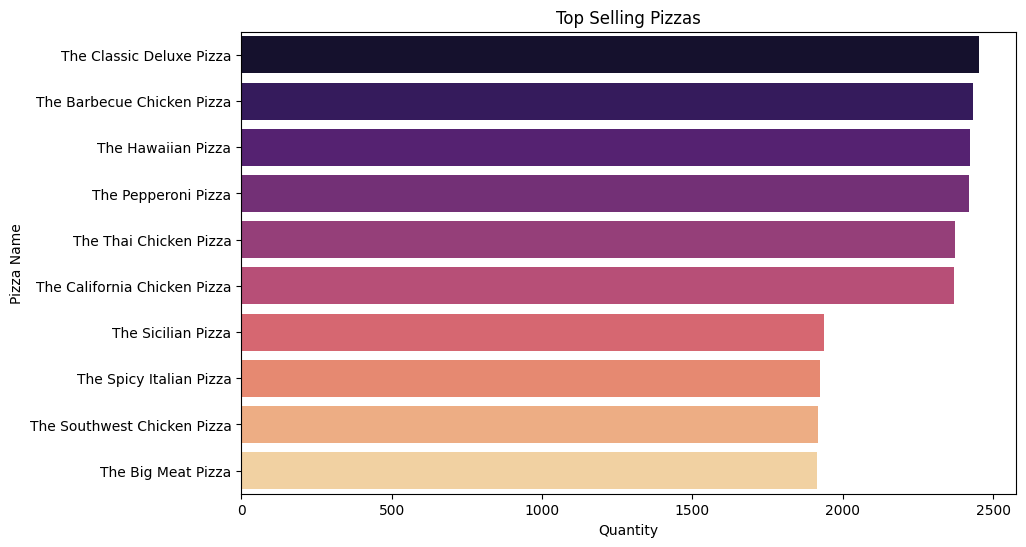

In [19]:
plt.figure(figsize=(10, 6))
sns.barplot(x='quantity', y='name', data=top_selling_pizza.reset_index(), palette='magma')
plt.xlabel('Quantity')
plt.ylabel('Pizza Name')
plt.title('Top Selling Pizzas')
plt.show()

NameError: name 'revenue_by_category' is not defined

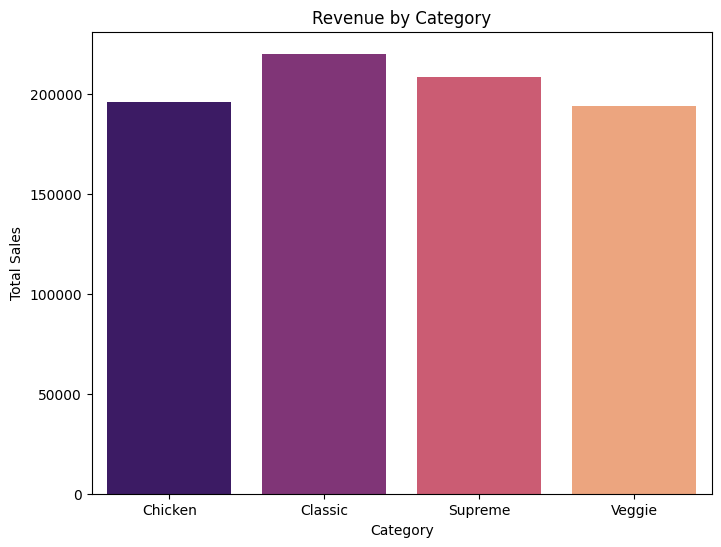

In [21]:
# revenue by category
revenue_by_category = data.groupby('category')['total_sales'].sum()
revenue_by_category

plt.figure(figsize=(8, 6))
sns.barplot(x=revenue_by_category.index, y=revenue_by_category.values, palette='magma')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.title('Revenue by Category')
plt.show()

Focus marketing efforts on top-selling pizzas and high-revenue categories.

Consider creating promotions or bundles for underperforming categories to boost sales.

Revenue Contribution by Pizza Size

In [ ]:
data.head()

In [22]:
size_contribution = data.groupby('size')['total_sales'].sum()
size_contribution

,total_sales
size,
L,375318.70
M,249382.25
S,178076.50
XL,14076.00
XXL,1006.60


consider promoting L and M Size more aggressively.

Offer discounts on smaller sizes to encourage upselling to larger sizes.

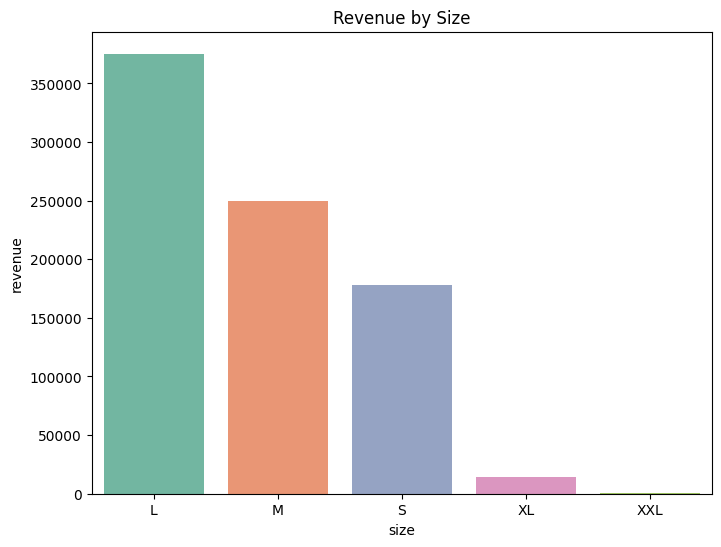

In [23]:
plt.figure(figsize=(8, 6))
sns.barplot(x=size_contribution.index, y=size_contribution.values, palette='Set2')
plt.xlabel('size')
plt.ylabel('revenue')
plt.title('Revenue by Size')
plt.show()

Peak Ordering Time and Days

In [24]:
hourly_orders = data.groupby('time')['quantity'].sum()
hourly_orders

,quantity
time,
9,4
10,18
11,2728
12,6776
13,6413
14,3613
15,3216
16,4239
17,5211


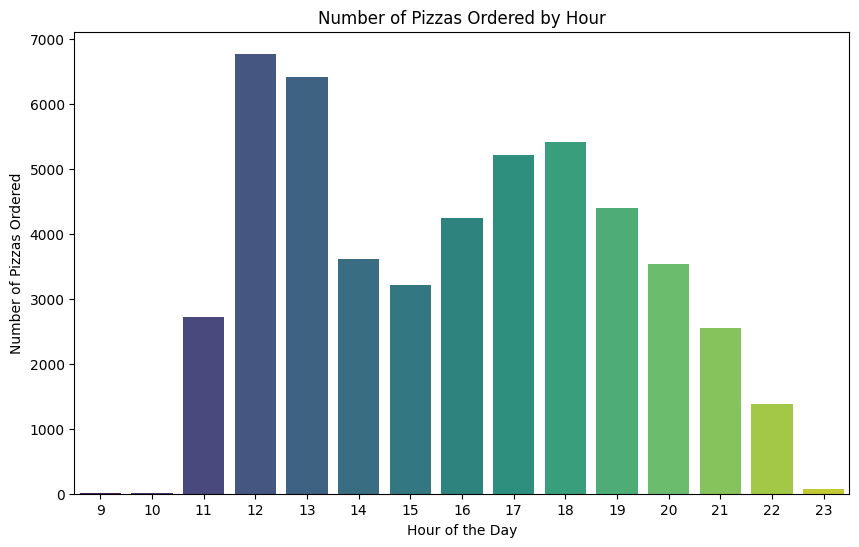

In [25]:

plt.figure(figsize=(10, 6))
sns.barplot(x=hourly_orders.index, y=hourly_orders.values, palette='viridis')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Pizzas Ordered')
plt.title('Number of Pizzas Ordered by Hour')
plt.show()


In [26]:
daily_revenue = data.groupby('day_of_week')['total_sales'].sum()
daily_revenue

,total_sales
day_of_week,
Friday,136073.90
Monday,107329.55
Saturday,123182.40
Sunday,99203.50
Thursday,123528.50
Tuesday,114133.80
Wednesday,114408.40


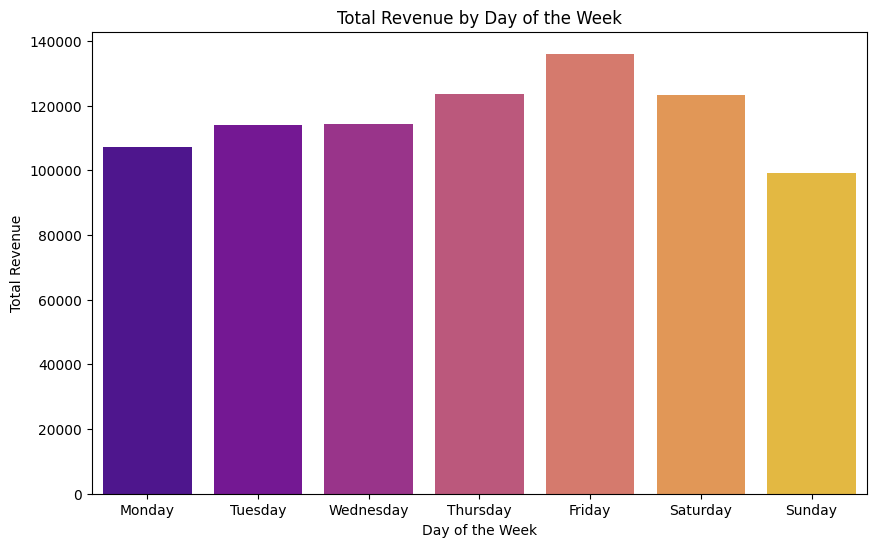

In [27]:


# Order the days of the week correctly
days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
daily_revenue = daily_revenue.reindex(days_order)


plt.figure(figsize=(10, 6))
sns.barplot(x=daily_revenue.index, y=daily_revenue.values, palette='plasma')
plt.xlabel('Day of the Week')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Day of the Week')
plt.show()
